# 0.5 Million Events with odd number channels

0.5 million events span runs 348 - 352.

Creating the MuonDataFrame Objects and DataFrames.

In [1]:
from MuonDataFrame import *

isNew = "False"

f1 = "processed_data/events_data_frame_348.h5"
f2 = "processed_data/events_data_frame_349.h5"
f3 = "processed_data/events_data_frame_350.h5"
f4 = "processed_data/events_data_frame_351.h5"
f5 = "processed_data/events_data_frame_352.h5"


mdfo0 = MuonDataFrame(f1, isNew=isNew, d1="last")
mdfo1 = MuonDataFrame(f2, isNew=isNew, d1="last")
mdfo2 = MuonDataFrame(f3, isNew=isNew, d1="last")
mdfo3 = MuonDataFrame(f4, isNew=isNew, d1="last")
mdfo4 = MuonDataFrame(f5, isNew=isNew, d1="last")

In [2]:
mdf0 = mdfo0.events_df
mdf1 = mdfo1.events_df
mdf2 = mdfo2.events_df
mdf3 = mdfo3.events_df
mdf4 = mdfo4.events_df

Creating seperate .csv files

In [3]:
mdfo0.getCompleteCSVOutputFile()
mdfo1.getCompleteCSVOutputFile()
mdfo2.getCompleteCSVOutputFile()
mdfo3.getCompleteCSVOutputFile()
mdfo4.getCompleteCSVOutputFile()

processed_data/events_data_frame_348.csv has been created
processed_data/events_data_frame_349.csv has been created
processed_data/events_data_frame_350.csv has been created
processed_data/events_data_frame_351.csv has been created
processed_data/events_data_frame_352.csv has been created


Merging all the runs together and generating a .csv file

In [4]:
mdf_list = [mdf0,mdf1,mdf2,mdf3,mdf4]
mdf1M = mdfo0.getMergedMDF(mdf_list)
mdf1M.to_csv("processed_data/runOdd.csv", header=True, index=False)

Creating a report pdf for all events combined together.

In [3]:
import copy

mdf_list = [mdf0,mdf1,mdf2,mdf3,mdf4]
mdf1M = mdfo0.getMergedMDF(mdf_list)

mdfo1M = copy.copy(mdfo0)
mdfo1M.events_df = mdf1M

In [ ]:
mdfo1M.generateAnaReport("runOddChanels.pdf")

# A Study on Finding Cut Criterion to Reduce Noise

Lets make the following cuts and study the results:

- Cut on TDC difference between two channels
- Cut on Peaks around asymmetry bars
- Cut on Individual TDC
- Cut on TDC over events
- Cut on L vs R plots

Dr. Akchurin confirmed that while these cuts helped 

## Investigation into the source of noise

In [17]:
def getDPlot(mdfo, queries, title="", xlims=None,ylims=None):
    mdfo.events_df.plot.scatter(x=queries[0],
                                y=queries[1],
                                c=queries[2],
                                colormap='viridis')
    plt.xlim(xlims)
    plt.ylim(ylims)
    plt.title(title)
    plt.show()

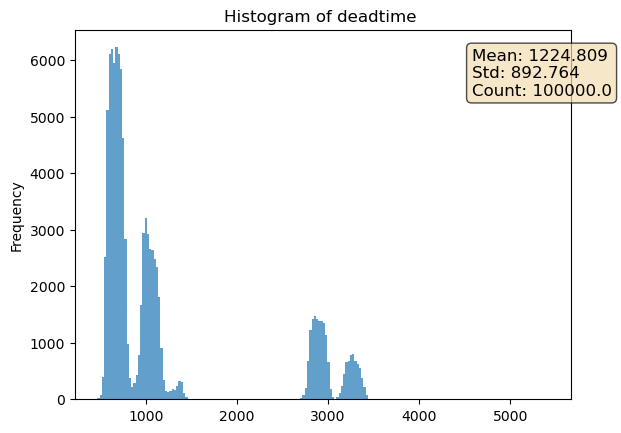

In [42]:
mdfo1M.getDeadtimePlot()

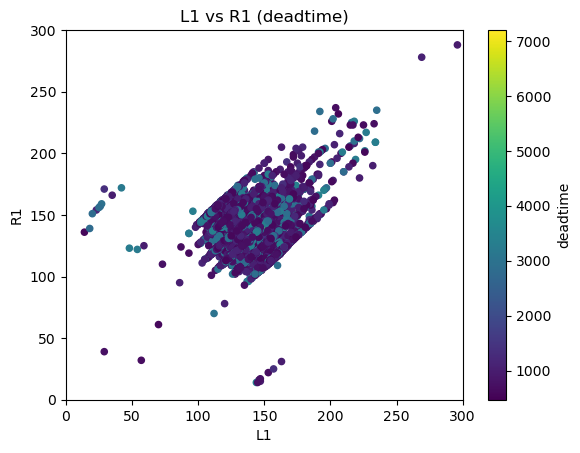

In [16]:
ana = ['L1','R1','deadtime']

getDPlot(mdfo1M,ana,"{} vs {} ({})".format(ana[0],ana[1],ana[2]),xlims=(0,300),ylims=(0,300))

### Keeping Deadtimes less than 600, 1000, 1500, 2000

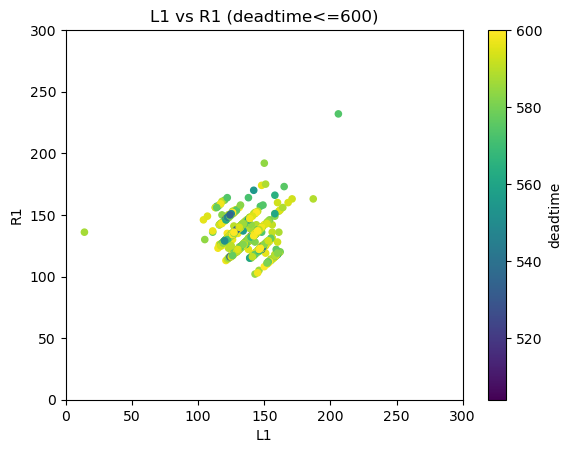

In [33]:
mdfo1M.reload()
val = 600

mdfo1M.keepEvents('deadtime',val,'<=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

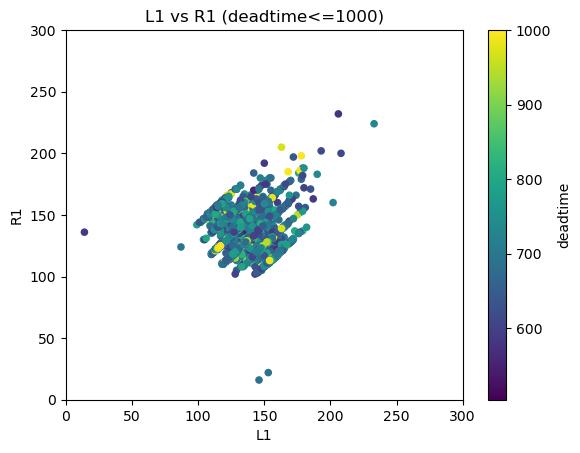

In [34]:
mdfo1M.reload()
val = 1000

mdfo1M.keepEvents('deadtime',val,'<=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

## Deadtimes (2000,1500)

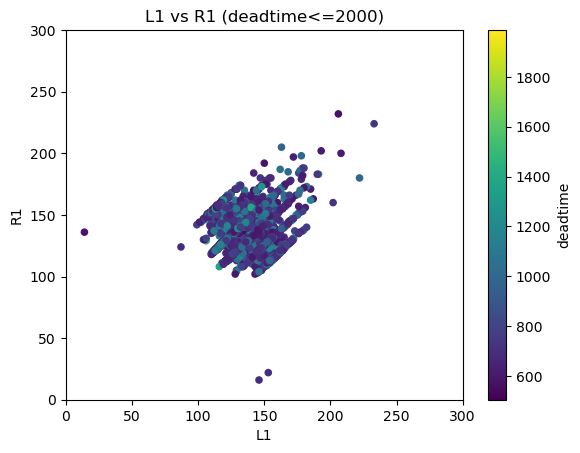

In [36]:
mdfo1M.reload()
val = 2000

mdfo1M.keepEvenats('deadtime',val,'<=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

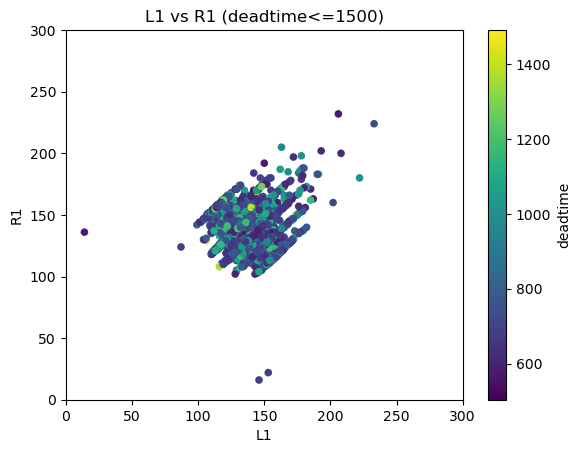

In [35]:
mdfo1M.reload()
val = 1500

mdfo1M.keepEvents('deadtime',val,'<=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

If we can define **noise** quantitatively then we can see the correlation between deadtimes and the noise more systematically.

### Keeping high deadtimes:

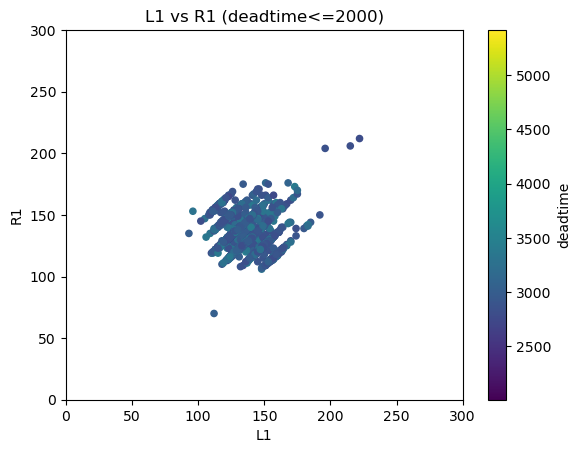

In [38]:
mdfo1M.reload()
val = 2000

mdfo1M.keepEvents('deadtime',val,'>=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

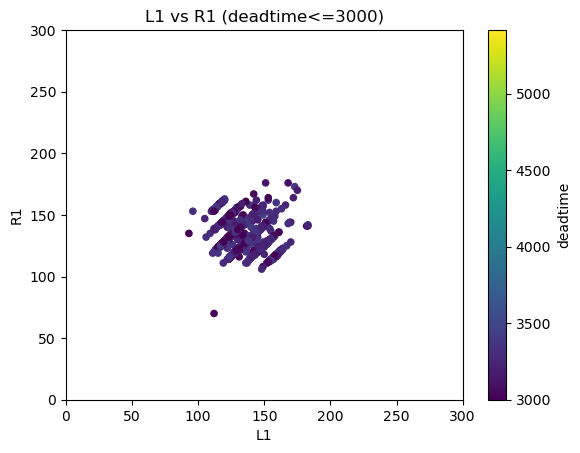

In [39]:
mdfo1M.reload()
val = 3000

mdfo1M.keepEvents('deadtime',val,'>=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

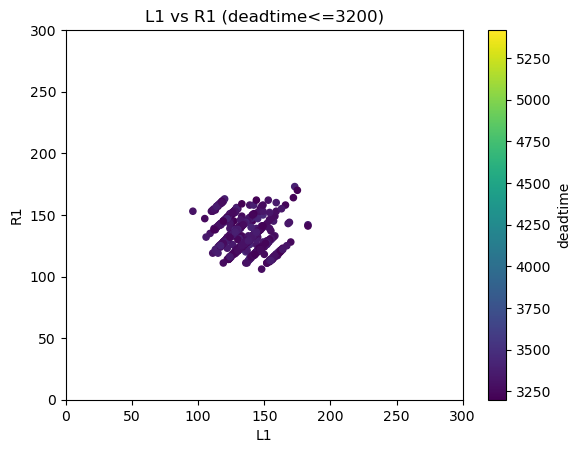

In [42]:
mdfo1M.reload()
val = 3200

mdfo1M.keepEvents('deadtime',val,'>=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

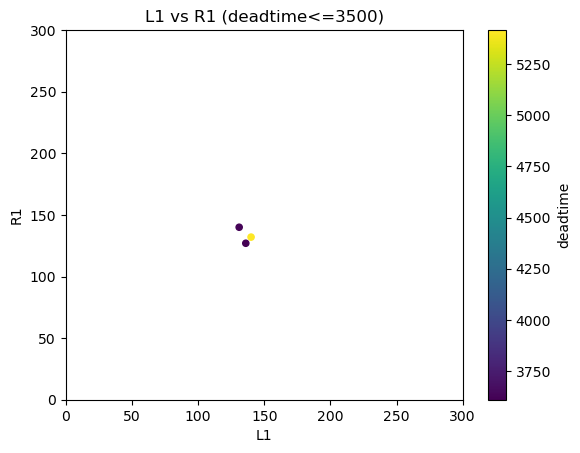

In [43]:
mdfo1M.reload()
val = 3500

mdfo1M.keepEvents('deadtime',val,'>=')
ana = ['L1','R1','deadtime']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

Data seems to look better at both higher and lower deadtimes.

### Keeping Events that are in the rising edge of top and bottom counters

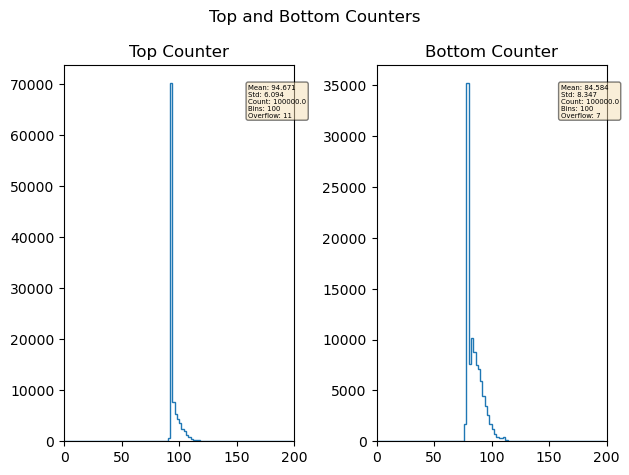

In [46]:
mdfo1M.reload()
mdfo1M.getCounterPlots()

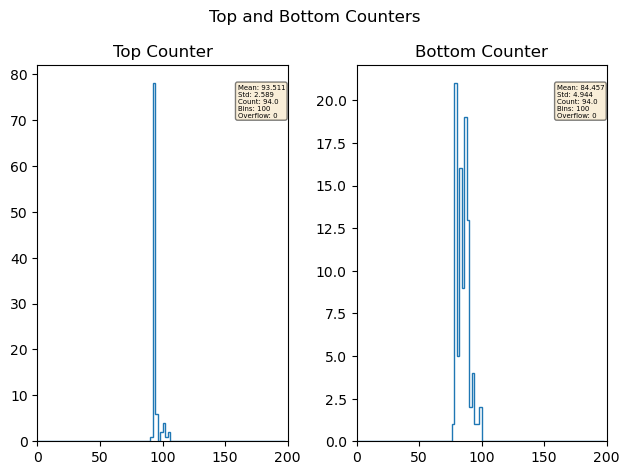

In [47]:
mdfo1M.keep4by4Events()
mdfo1M.getCounterPlots()

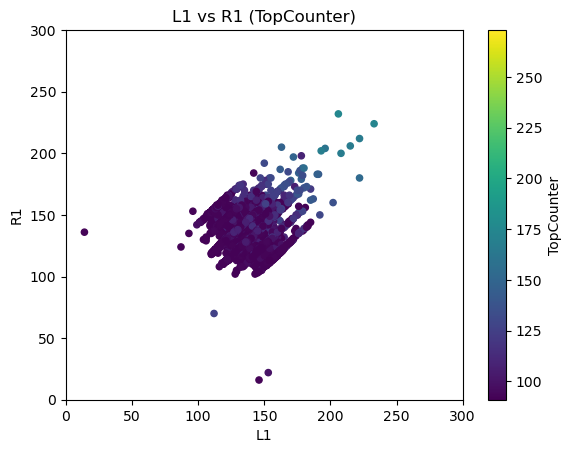

In [41]:
mdfo1M.reload()
ana = ['L1','R1','TopCounter']
getDPlot(mdfo1M,ana,"{} vs {} ({})".format(ana[0],ana[1],ana[2]),xlims=(0,300),ylims=(0,300))
#getDPlot(mdfo1M,ana,"{} vs {} ({})".format(ana[0],ana[1],ana[2]))

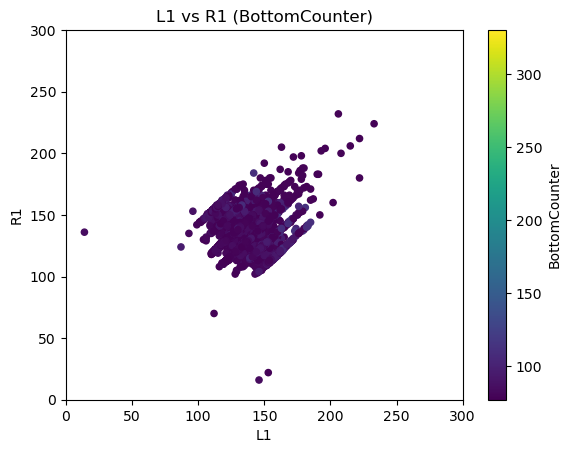

In [61]:
mdfo1M.reload()
ana = ['L1','R1','BottomCounter']
getDPlot(mdfo1M,ana,"{} vs {} ({})".format(ana[0],ana[1],ana[2]),xlims=(0,300),ylims=(0,300))

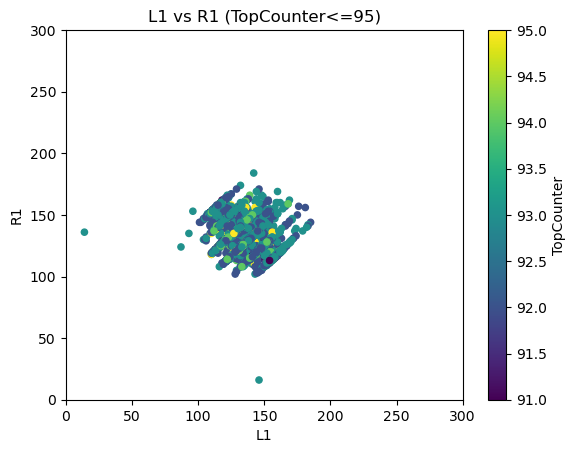

In [49]:
mdfo1M.reload()
val = 95
mdfo1M.keepEvents('TopCounter',val,"<=")
ana = ['L1','R1','TopCounter']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

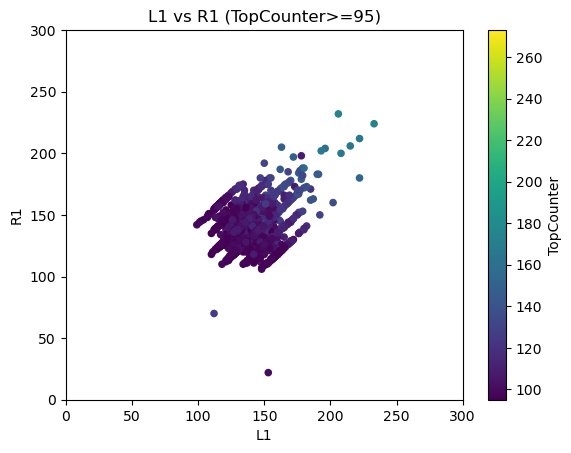

In [65]:
mdfo1M.reload()
val = 95
mdfo1M.keepEvents('TopCounter',val,">=")
ana = ['L1','R1','TopCounter']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

### bottom counters

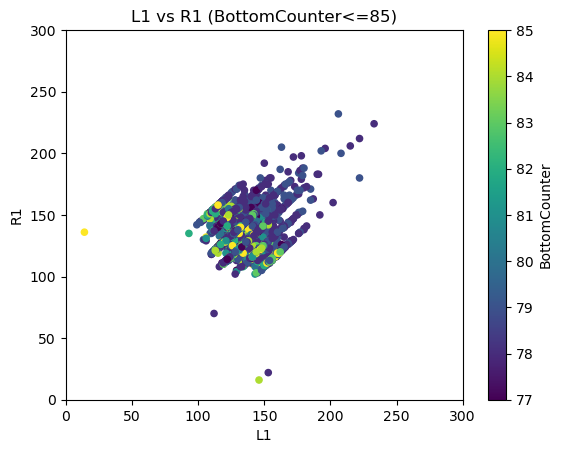

In [58]:
mdfo1M.reload()
val = 85
mdfo1M.keepEvents('BottomCounter',val,"<=")
ana = ['L1','R1','BottomCounter']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

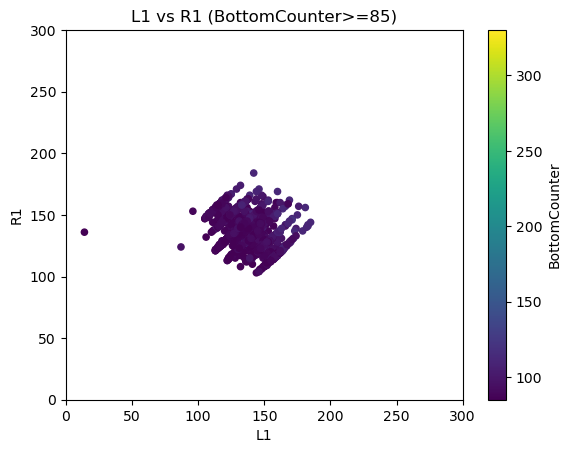

In [59]:
mdfo1M.reload()
val = 85
mdfo1M.keepEvents('BottomCounter',val,">=")
ana = ['L1','R1','BottomCounter']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

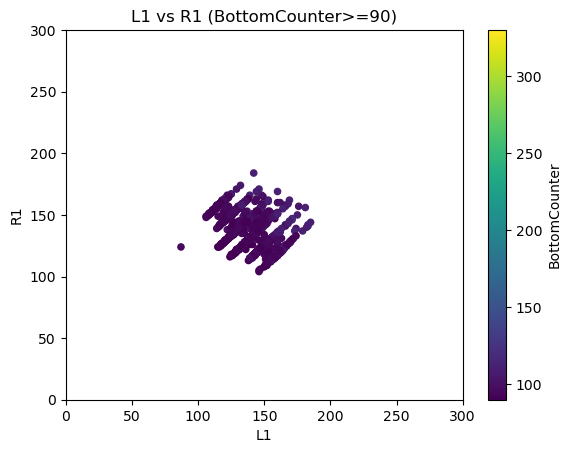

In [66]:
mdfo1M.reload()
val = 90
mdfo1M.keepEvents('BottomCounter',val,">=")
ana = ['L1','R1','BottomCounter']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

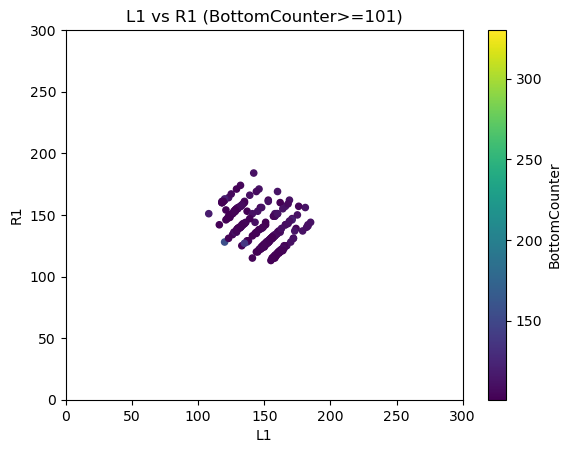

In [69]:
mdfo1M.reload()
val = 101
mdfo1M.keepEvents('BottomCounter',val,">=")
ana = ['L1','R1','BottomCounter']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

Interestingly the dying edge of the bottom counter has the clean events! Lets create a report using these events only.

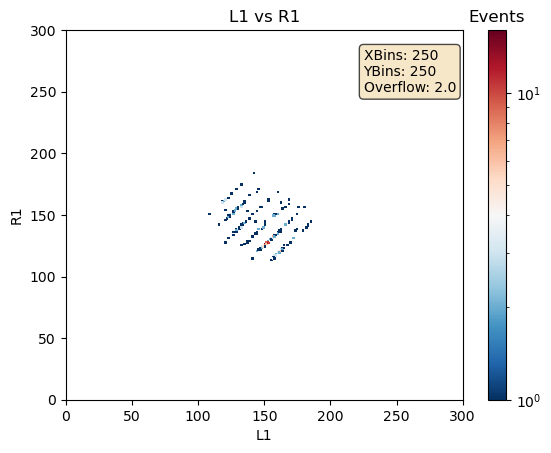

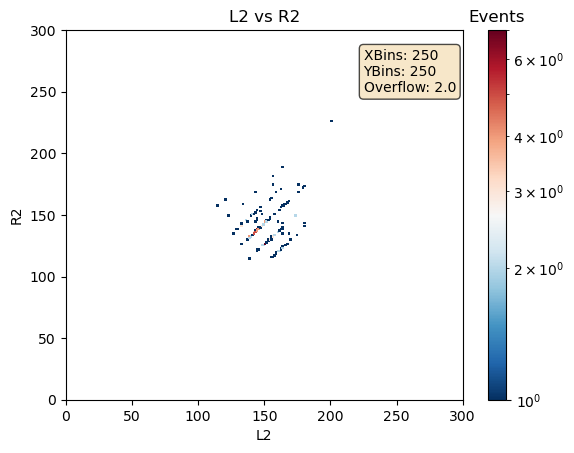

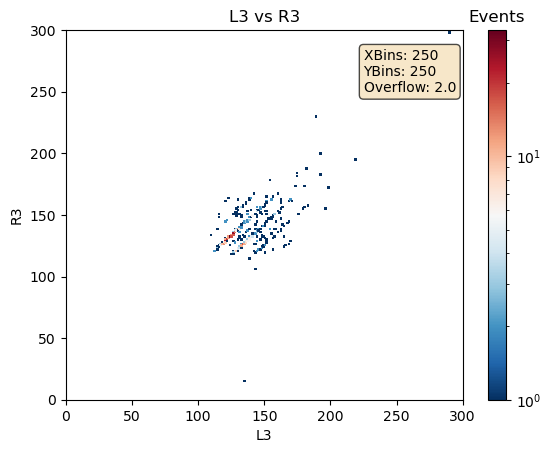

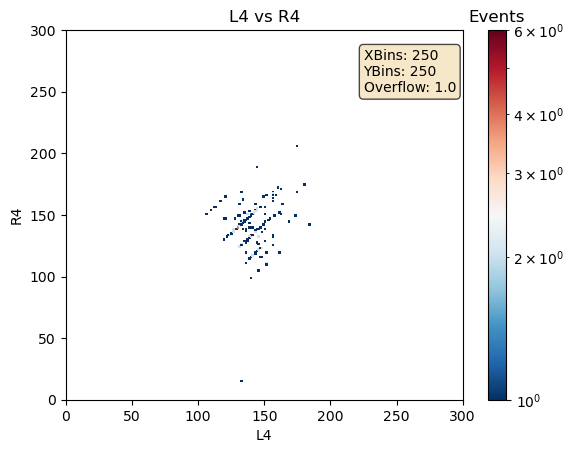

In [11]:
mdfo1M.reload()
val = 101
mdfo1M.keepEvents('BottomCounter',val,">=")
mdfo1M.getFingerPlots()


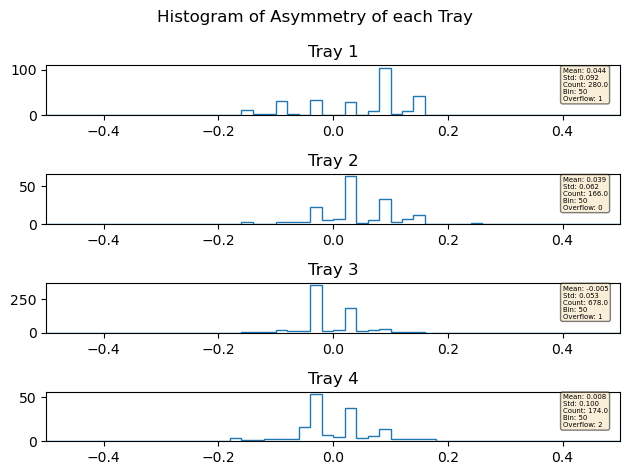

In [12]:
mdfo1M.getAsymmetry1DPlots()

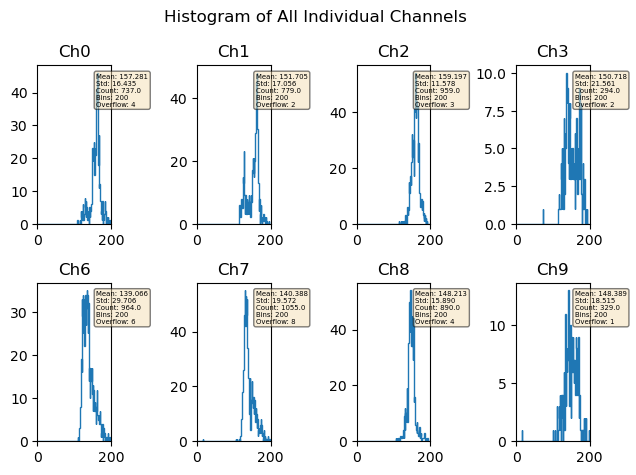

In [15]:
mdfo1M.getChannelPlots()

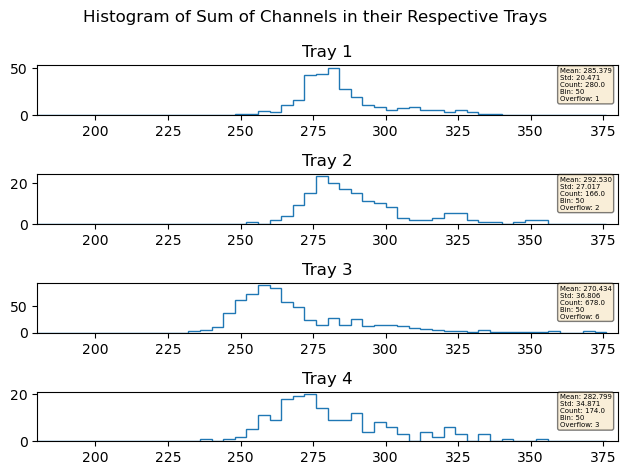

In [13]:
mdfo1M.getChannelSumPlots()

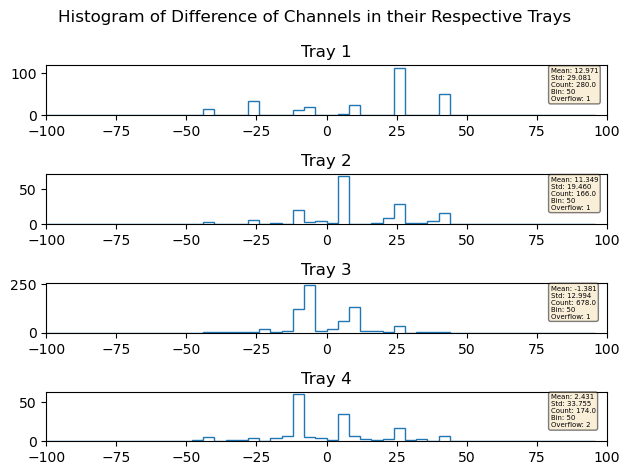

In [14]:
mdfo1M.getChannelDiffPlots()

Further investigation is needed onto this.

### Scaler Channels

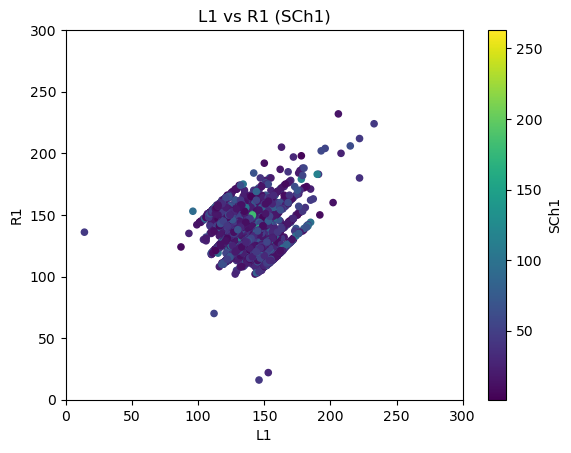

In [18]:
mdfo1M.reload()
ana = ['L1','R1','SCh1']
getDPlot(mdfo1M,ana,"{} vs {} ({})".format(ana[0],ana[1],ana[2]),xlims=(0,300),ylims=(0,300))

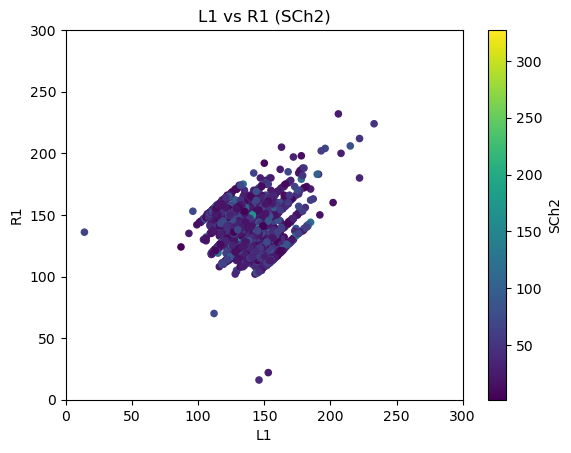

In [29]:
mdfo1M.reload()
ana = ['L1','R1','SCh2']
getDPlot(mdfo1M,ana,"{} vs {} ({})".format(ana[0],ana[1],ana[2]),xlims=(0,300),ylims=(0,300))

### Channel 1

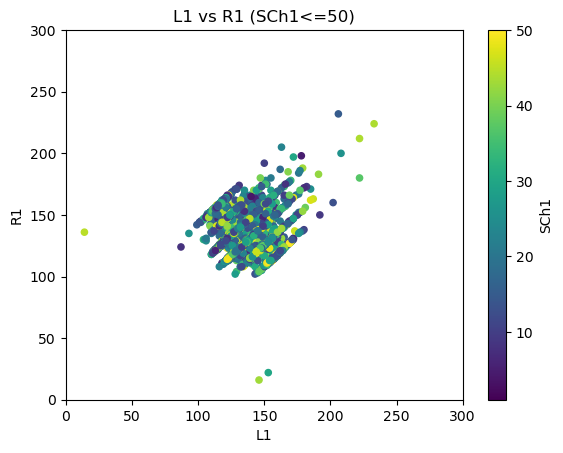

In [22]:
mdfo1M.reload()
val = 50
mdfo1M.keepEvents('SCh1',val,"<=")
ana = ['L1','R1','SCh1']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

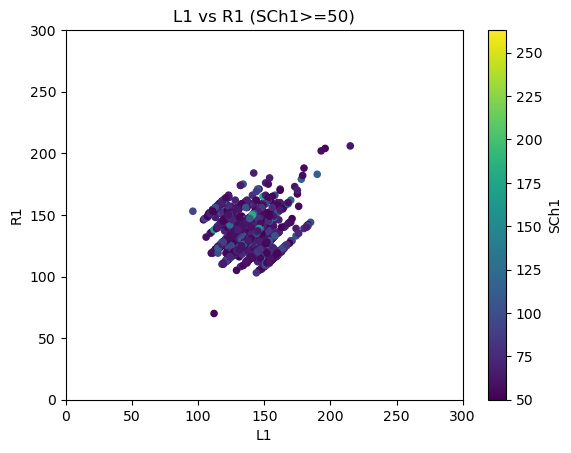

In [24]:
mdfo1M.reload()
val = 50
mdfo1M.keepEvents('SCh1',val,">=")
ana = ['L1','R1','SCh1']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

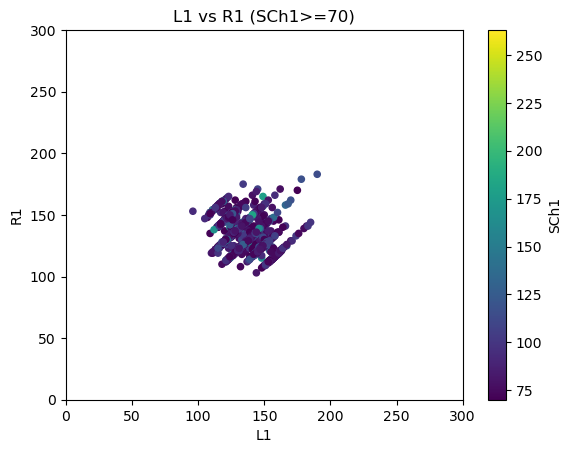

In [27]:
mdfo1M.reload()
val = 70
mdfo1M.keepEvents('SCh1',val,">=")
ana = ['L1','R1','SCh1']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

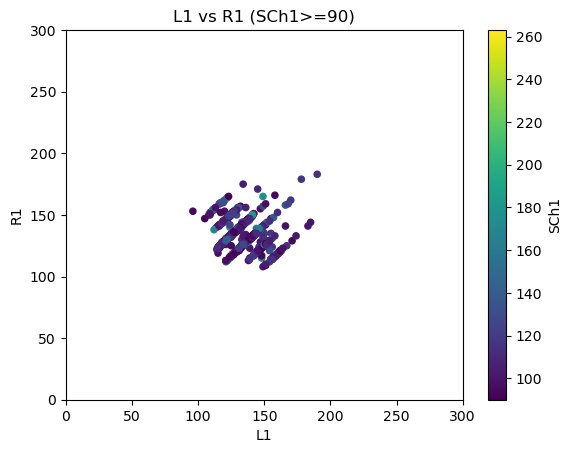

In [28]:
mdfo1M.reload()
val = 90
mdfo1M.keepEvents('SCh1',val,">=")
ana = ['L1','R1','SCh1']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

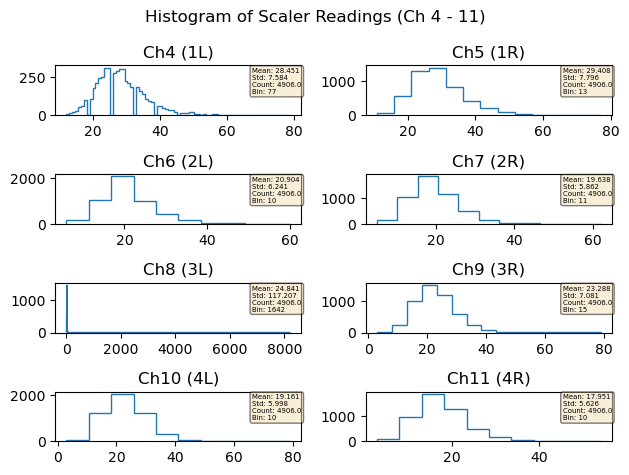

In [38]:
mdfo1M.reload()
val = 90
mdfo1M.keepEvents('SCh1',val,">=")
mdfo1M.getScalerPlots_channels()

### Channel 2

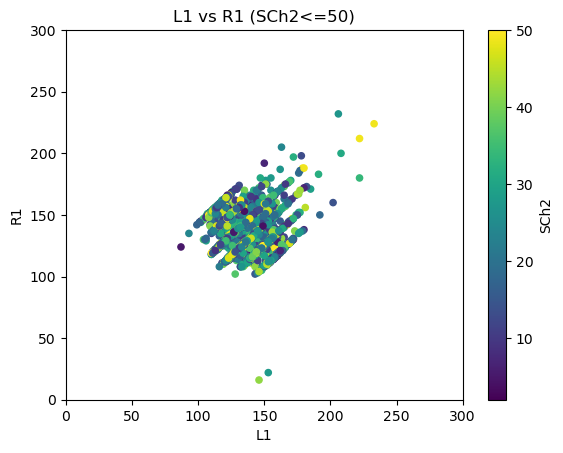

In [30]:
mdfo1M.reload()
val = 50
mdfo1M.keepEvents('SCh2',val,"<=")
ana = ['L1','R1','SCh2']


getDPlot(mdfo1M,ana,"{} vs {} ({}<={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

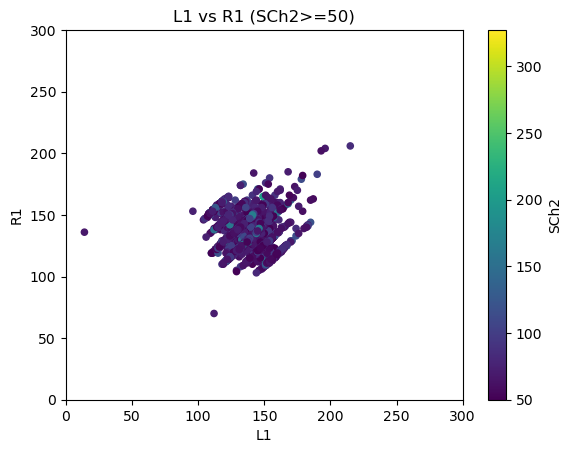

In [31]:
mdfo1M.reload()
val = 50
mdfo1M.keepEvents('SCh2',val,">=")
ana = ['L1','R1','SCh2']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

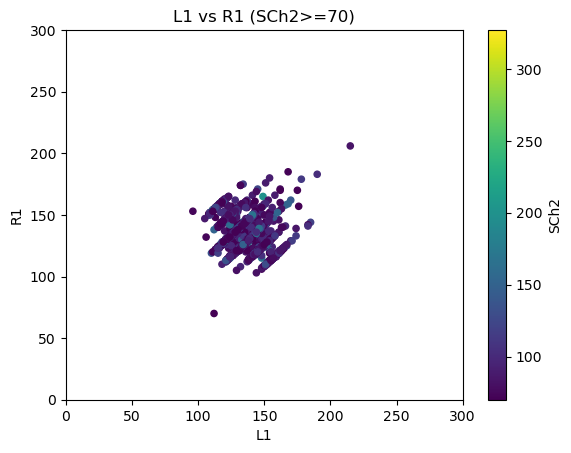

In [32]:
mdfo1M.reload()
val = 70
mdfo1M.keepEvents('SCh2',val,">=")
ana = ['L1','R1','SCh2'


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

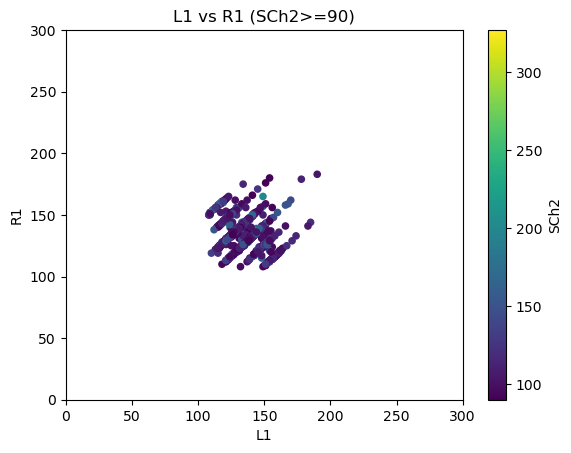

In [37]:
mdfo1M.reload()
val = 90
mdfo1M.keepEvents('SCh2',val,">=")
ana = ['L1','R1','SCh2']


getDPlot(mdfo1M,ana,"{} vs {} ({}>={})".format(ana[0],ana[1],ana[2],val),xlims=(0,300),ylims=(0,300))

### Finding out the coordinate system

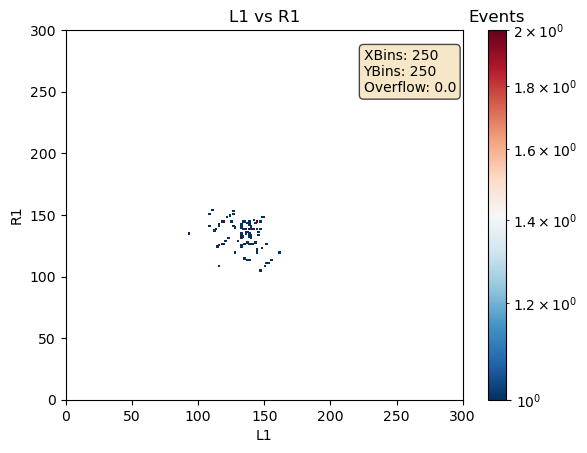

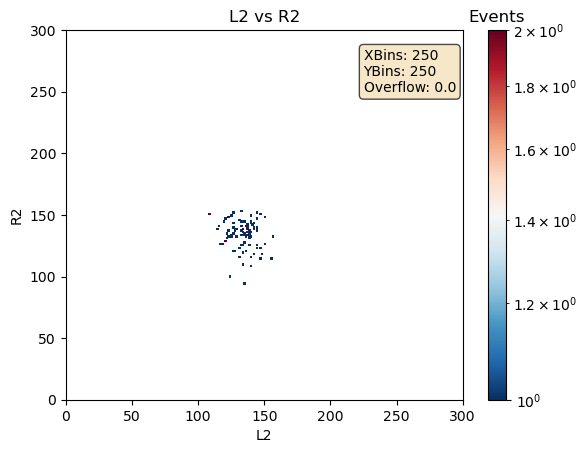

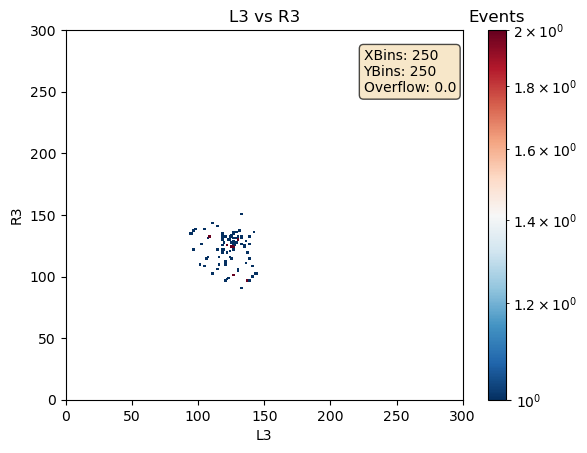

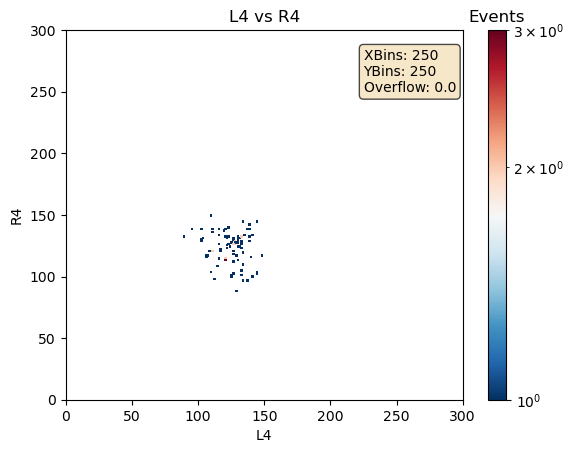

In [43]:
mdfo1M.getFingerPlots()

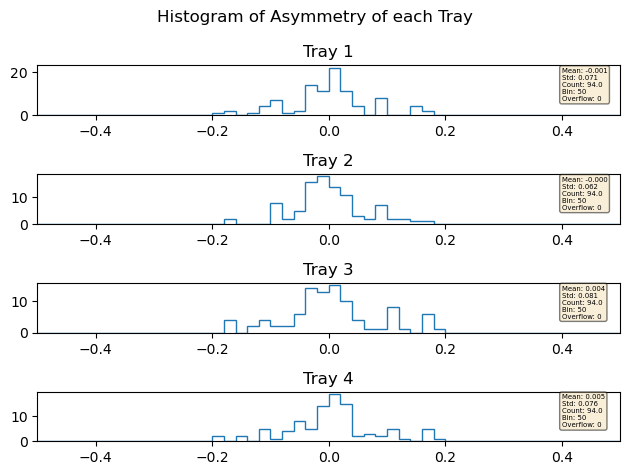

In [44]:
mdfo1M.getAsymmetry1DPlots()

In [36]:
mdfo1M.keepEvents('asymL1',0.15,">")

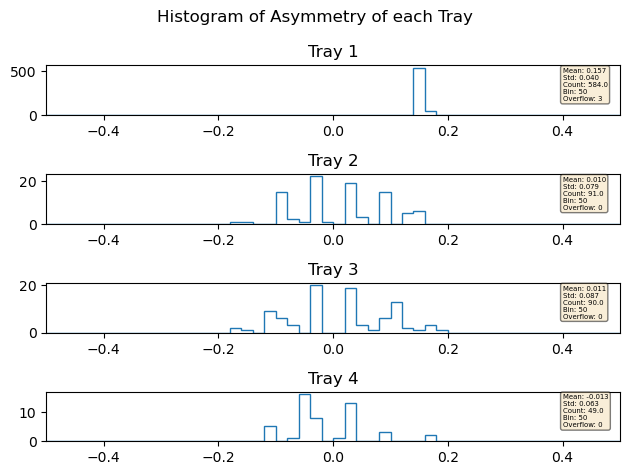

In [37]:
mdfo1M.getAsymmetry1DPlots()

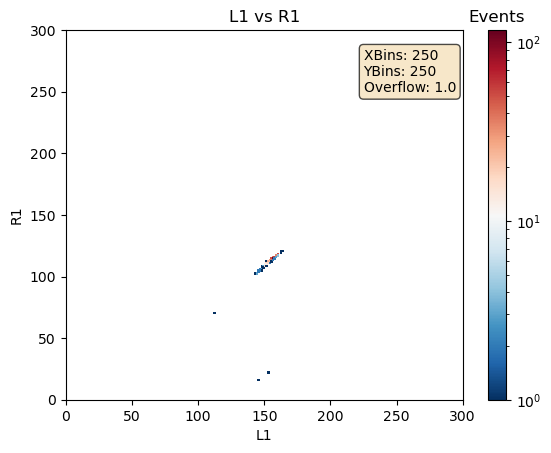

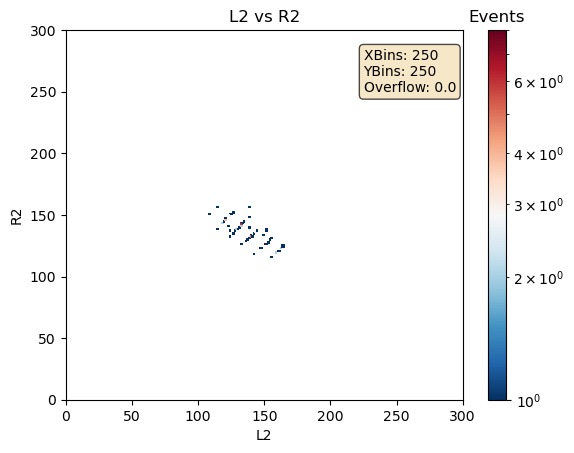

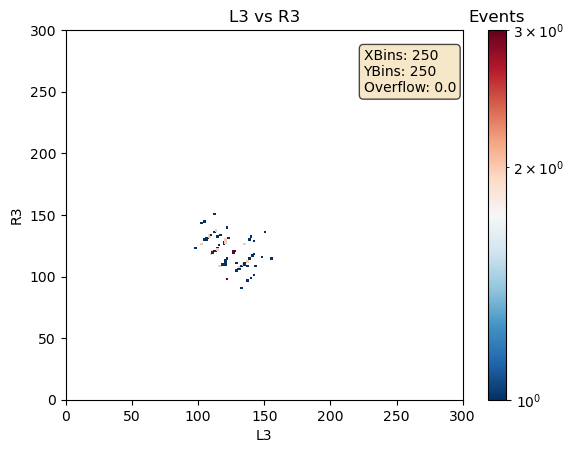

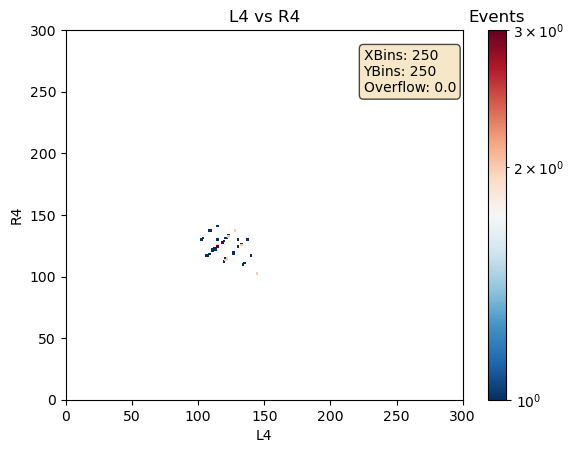

In [38]:
mdfo1M.getFingerPlots()